In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from sympy import symbols, diff, simplify
import sympy as sp

# Решение систем нелинейных уравнений

Найти с точностью $\epsilon=10^{-6}$ все корни системы нелинейных уравнений 

$$\begin{cases}
\cos(x_1+0.5)-x_2 = 0\\
\sin x_2-2x_1-1 = 0
\end{cases}$$

используя метод Ньютона для системы нелинейных уравнений. Найти корни с помощью встроенного блока решения уравнений.

In [2]:
def f(x):
    x = np.array(x)
    return np.array([np.cos(x[0] + 0.5) - x[1] - 2, np.sin(x[1]) - 2 * x[0] - 1])

def jac(x):
    return np.array([[-np.sin(x[0] + 0.5), -1], [-2, np.cos(x[1])]])

In [3]:
solution = optimize.root(f, jac=jac, x0=[-1, -1], method='hybr')
solution.x

array([-0.94501116, -1.09739414])

In [4]:
x1, x2 = symbols('x1 x2')

In [5]:
f1 = sp.cos(x1 + 0.5) - x2 - 2
f2 = sp.sin(x2) - 2 * x1 - 1
sp.solve(f2, x2)

[pi - asin(2*x1 + 1), asin(2*x1 + 1)]

In [6]:
def Newton(f0, A, x0, eps):
    x = x0
    sol = []
    it = 0
    for i in range(100):
        delta = np.linalg.solve(A(x), -f0(x))
        x += delta
        sol.append(x)
        it += 1
        if i != 0 :
            res = all(abs(sol[i] - sol[i-1]) <= eps)
            if res == 1:
                break
    return (x, it)

In [7]:
Newton(f, jac, [-1, -1], 10e-6)

(array([-0.94501079, -1.09739231]), 2)

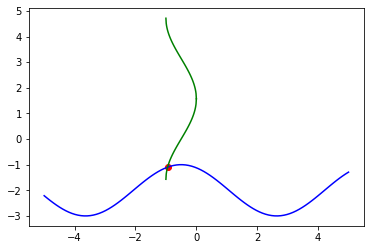

In [9]:
x = np.linspace(-5,5,100)
x1 = np.linspace(-1,0,100)
fig, ax = plt.subplots()
ax.plot(x, np.cos(x + 0.5) - 2, color='blue')
ax.plot(x1, np.pi - np.arcsin(2 * x1 + 1), color='green')
ax.plot(x1, np.arcsin(2 * x1 + 1), color='green')
ax.scatter(-0.94501116, -1.09739414, color='red')
plt.show()

Плоская однородная пластина имеет форму геометрической фигуры, образованной пересечением двух кривых второго порядка.

In [11]:
x, y = symbols('x y')

In [12]:
sp.solve(sp.sqrt((-3.1 - x)**2 + (-0.3 - y)**2) - sp.sqrt((1.1 - x)**2 + (-1.7 - y)**2) - 2, y)

[-2.88235294117647*x - 5.4761725661839*sqrt(0.5*x**2 + x + 0.245) - 3.88235294117647,
 -2.88235294117647*x + 5.4761725661839*sqrt(0.5*x**2 + x + 0.245) - 3.88235294117647]

In [13]:
sp.solve(0.5*x**2 + x + 0.245 < 0, x)

(-1.71414284285429 < x) & (x < -0.285857157145715)

In [14]:
sp.solve(388*x+341*x**2-294*x*y-394-396*y-51*y**2, y)

[-49*x/17 - sqrt(39000*x**2 + 78000*x + 19110)/51 - 66/17,
 -49*x/17 + sqrt(39000*x**2 + 78000*x + 19110)/51 - 66/17]

In [15]:
sp.solve(x**2 / 36 + y**2 / 4 - 1, y)

[-sqrt(36 - x**2)/3, sqrt(36 - x**2)/3]

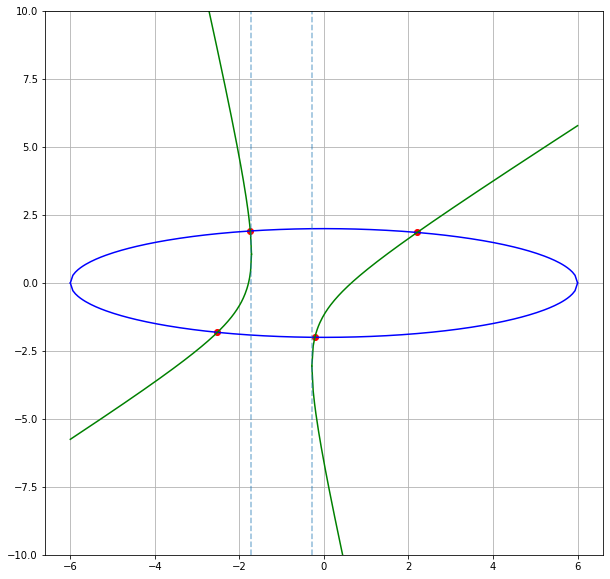

In [17]:
x = np.linspace(-6, 6, 200)
y = np.linspace(-6, -1.71414284285429, 200)
z = np.linspace(-0.2858571571457149, 6, 200)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, -np.sqrt(36 - x**2)/3, color='blue')
ax.plot(x, np.sqrt(36 - x**2)/3, color='blue')
ax.plot(y, -49*y/17 - np.sqrt(39000*y**2 + 78000*y + 19110)/51 - 66/17, color='green')
ax.plot(z, -49*z/17 - np.sqrt(39000*z**2 + 78000*z + 19110)/51 - 66/17, color='green')
ax.plot(y, -49*y/17 + np.sqrt(39000*y**2 + 78000*y + 19110)/51 - 66/17, color='green')
ax.plot(z, -49*z/17 + np.sqrt(39000*z**2 + 78000*z + 19110)/51 - 66/17, color='green')
ax.scatter(-0.21470771, -1.99871905, color='red')
ax.scatter(2.20456832, 1.8601039, color='red')
ax.scatter(-2.52064465, -1.81497463, color='red')
ax.scatter(-1.74172555,  1.9138789, color='red')
ax = plt.gca()
ax.grid()
ax.set_ylim([-10, 10])
plt.axvline(x=-1.71414284285429, linestyle='--', alpha=0.5)
plt.axvline(x=-0.2858571571457149, linestyle='--', alpha=0.5)
plt.show()

In [18]:
def g(x):
    return np.array([388 * x[0] + 341 * x[0]**2 - 294 * x[0] * x[1] - 394 - 396 * x[1] - 51 * x[1]**2, 
                     x[0]**2 / 36 + x[1]**2 / 4 - 1])

def dg(x):
    return([[682*x[0] - 294*x[1] + 388, -294*x[0] - 102*x[1] - 396], [x[0]/18, x[1]/2]])

In [19]:
x0 = [[-3, -2], [-1, 2], [0, -2], [2, 2]]

for start in x0:
    print(Newton(g, dg, start, 10e-6))

(array([-2.52122979, -1.81494789]), 2)
(array([-1.75047627,  1.91398977]), 2)
(array([-0.21459899, -1.99872772]), 2)
(array([2.2046785 , 1.86010751]), 2)
